In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ks_1samp, false_discovery_control
import scipy
from sklearn import metrics, neighbors, tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, roc_curve
from sklearn.feature_selection import SelectFdr, f_classif, SequentialFeatureSelector
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from statsmodels.stats.multitest import fdrcorrection

In [15]:
columns = ['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
data=pd.read_csv('letter-recognition.data', names=columns)

data.head

<bound method NDFrame.head of       lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T      2      8      3     5      1      8     13      0      6   
1         I      5     12      3     7      2     10      5      5      4   
2         D      4     11      6     8      6     10      6      2      6   
3         N      7     11      6     6      3      5      9      4      6   
4         G      2      1      3     1      1      8      6      6      6   
...     ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995     D      2      2      3     3      2      7      7      7      6   
19996     C      7     10      8     8      4      4      8      6      9   
19997     T      6      9      6     7      5      6     11      3      7   
19998     S      2      3      4     2      1      8      7      2      6   
19999     A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-e

In [16]:
x = data.iloc[:,1:]

x.head

<bound method NDFrame.head of        x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       x2ybr  xy2br  x-ege  xegvy

In [18]:
y = data.iloc[:,:1]

y.head

<bound method NDFrame.head of       lettr
0         T
1         I
2         D
3         N
4         G
...     ...
19995     D
19996     C
19997     T
19998     S
19999     A

[20000 rows x 1 columns]>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [20]:
model = svm.SVC()
cv_results = cross_validate(model, x, y.values.ravel(), cv=10)

print(np.mean(cv_results['test_score']))
cv_results['test_score']

KeyboardInterrupt: 

In [12]:
model = DecisionTreeClassifier()
cv_results = cross_validate(model, x, y.values.ravel(), cv=10)

print(np.mean(cv_results['test_score']))
cv_results['test_score']

0.8831499999999999


array([0.898 , 0.874 , 0.8745, 0.886 , 0.8875, 0.872 , 0.8985, 0.8845,
       0.8785, 0.878 ])

In [13]:
model = KNeighborsClassifier()
cv_results = cross_validate(model, x, y.values.ravel(), cv=10)

print(np.mean(cv_results['test_score']))
cv_results['test_score']

0.9550500000000002


array([0.9615, 0.9545, 0.9595, 0.9505, 0.961 , 0.948 , 0.956 , 0.9605,
       0.951 , 0.948 ])

In [35]:
kernel = ['rbf']
gamma = ['auto']
C = [3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0,]

svm_grid = {'kernel': kernel,
            'C': C,
               'gamma': gamma}

sv = svm.SVC()
SVM = GridSearchCV(estimator = sv, param_grid=svm_grid, cv = 10, verbose=4, n_jobs = -1)

In [36]:
SVM.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                               4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
                               5.0],
                         'gamma': ['auto'], 'kernel': ['rbf']},
             verbose=4)

In [26]:
SVM.best_params_

{'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [34]:
SVM.best_params_

{'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [38]:
SVM.best_params_

{'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [13]:
SVM.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [41]:
max_features = ['sqrt', 'log2']
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 40, num = 10)]
max_depth.append(None)
min_samples_split = [10, 30, 50, 100, 150, 200]
min_samples_leaf = [1, 16, 64, 256]
tree_grid = {'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

tr = DecisionTreeClassifier()
tree = GridSearchCV(estimator = tr, param_grid=tree_grid, cv = 10, verbose=4, n_jobs = -1)

In [44]:
tree.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 1584 candidates, totalling 15840 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 9, 14, 18, 22, 27, 31, 35, 40,
                                       None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 16, 64, 256],
                         'min_samples_split': [10, 30, 50, 100, 150, 200]},
             verbose=4)

In [45]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [43]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 27,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [37]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [47]:
n_neighbors = [5, 10, 30, 50, 100, 150, 200]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(2, 50, num = 5)]

knn_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size}

kn = KNeighborsClassifier()
knn = GridSearchCV(estimator = kn, param_grid=knn_grid, cv = 10, verbose=4, n_jobs = -1)

In [48]:
knn.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 14, 26, 38, 50],
                         'n_neighbors': [5, 10, 30, 50, 100, 150, 200],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [50]:
knn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 26,
 'n_neighbors': 5,
 'weights': 'distance'}

In [46]:
knn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 26,
 'n_neighbors': 5,
 'weights': 'distance'}

C:\Users\fresq\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9791666666666666


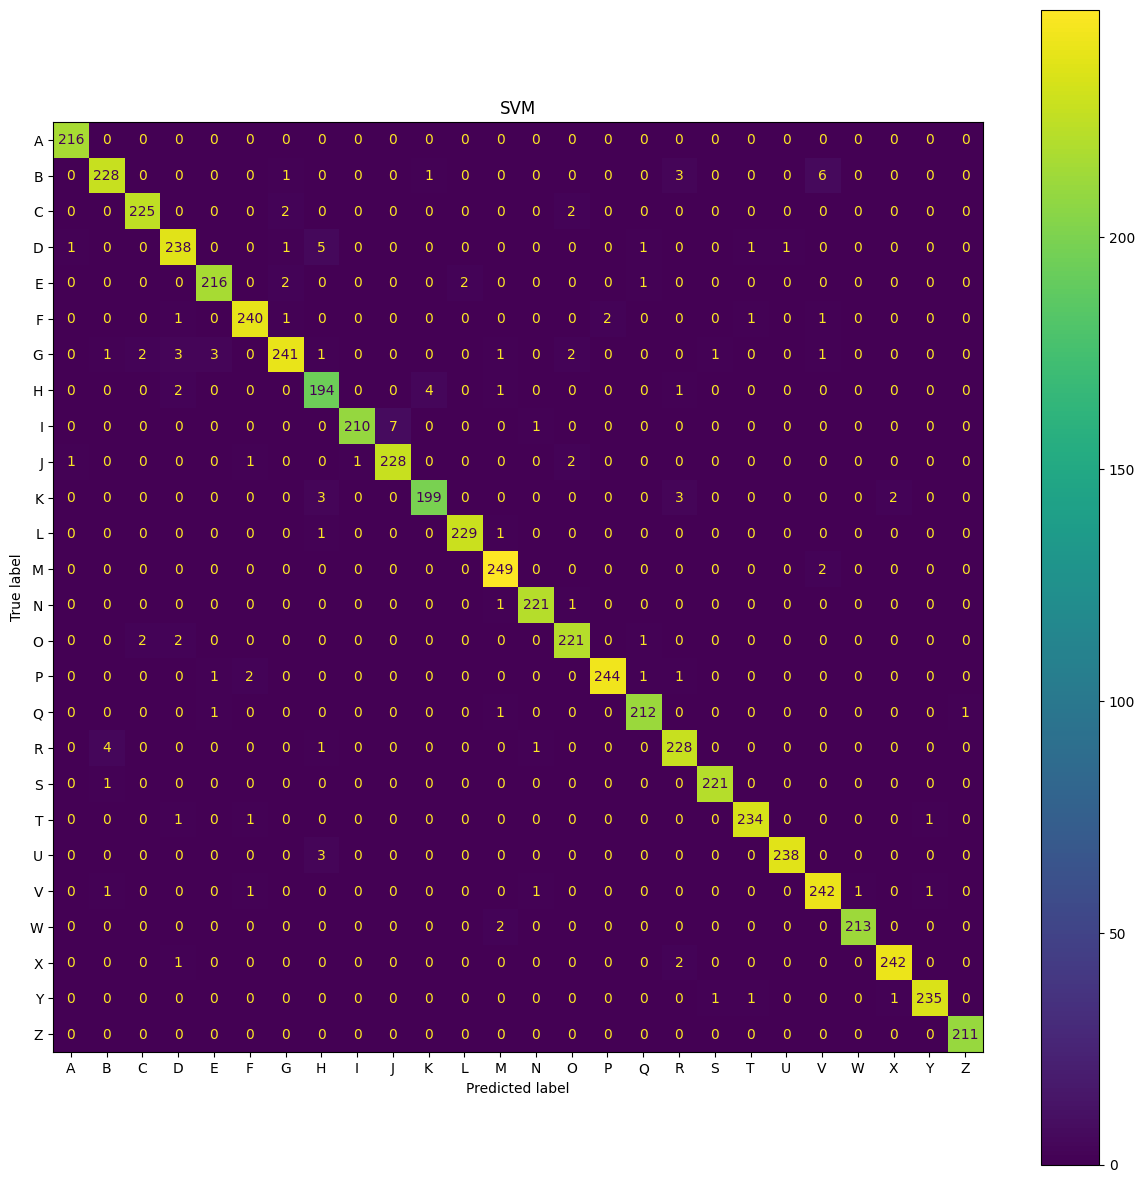

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       216
           B       0.97      0.95      0.96       239
           C       0.98      0.98      0.98       229
           D       0.96      0.96      0.96       248
           E       0.98      0.98      0.98       221
           F       0.98      0.98      0.98       246
           G       0.97      0.94      0.96       256
           H       0.93      0.96      0.95       202
           I       1.00      0.96      0.98       218
           J       0.97      0.98      0.97       233
           K       0.98      0.96      0.97       207
           L       0.99      0.99      0.99       231
           M       0.97      0.99      0.98       251
           N       0.99      0.99      0.99       223
           O       0.97      0.98      0.97       226
           P       0.99      0.98      0.99       249
           Q       0.98      0.99      0.98       215
           R       0.96    

In [39]:
model = svm.SVC(C = 4.0, gamma = 'auto', kernel= 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred.ravel()))

cm=confusion_matrix(y_test, y_pred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("SVM")
plt.show()
decisionReport=classification_report(y_test, y_pred.ravel())
print(decisionReport)

0.8191666666666667


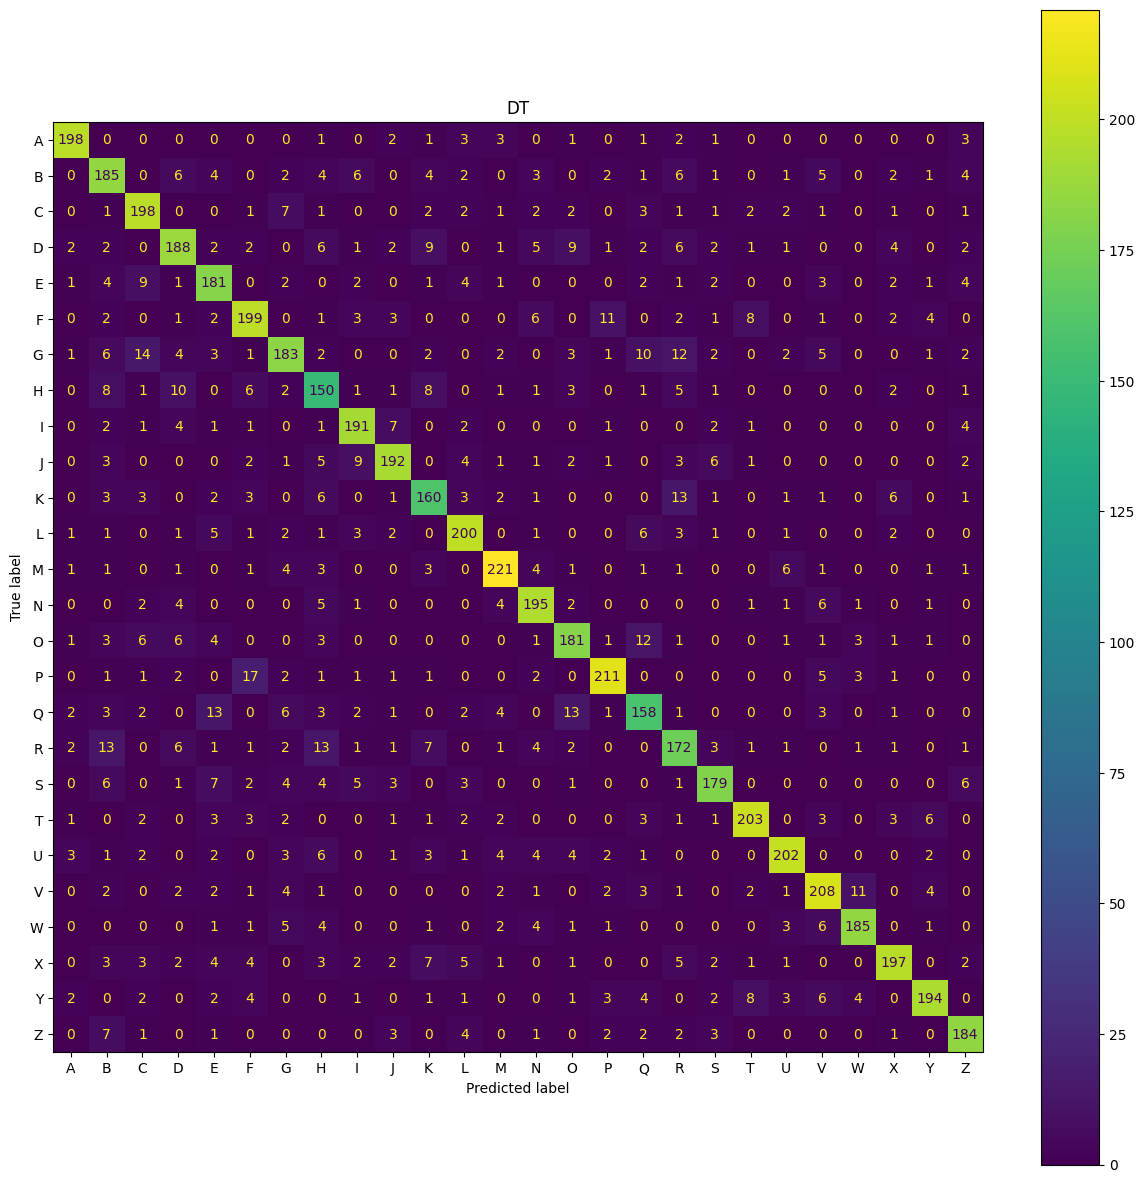

              precision    recall  f1-score   support

           A       0.92      0.92      0.92       216
           B       0.72      0.77      0.75       239
           C       0.80      0.86      0.83       229
           D       0.79      0.76      0.77       248
           E       0.75      0.82      0.79       221
           F       0.80      0.81      0.80       246
           G       0.79      0.71      0.75       256
           H       0.67      0.74      0.70       202
           I       0.83      0.88      0.85       218
           J       0.86      0.82      0.84       233
           K       0.76      0.77      0.77       207
           L       0.84      0.87      0.85       231
           M       0.87      0.88      0.88       251
           N       0.83      0.87      0.85       223
           O       0.80      0.80      0.80       226
           P       0.88      0.85      0.86       249
           Q       0.75      0.73      0.74       215
           R       0.72    

In [10]:
model= DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='log2',min_samples_leaf=1,min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred.ravel()))

cm=confusion_matrix(y_test, y_pred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("DT")
plt.show()
decisionReport=classification_report(y_test, y_pred.ravel())
print(decisionReport)

C:\Users\fresq\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.959


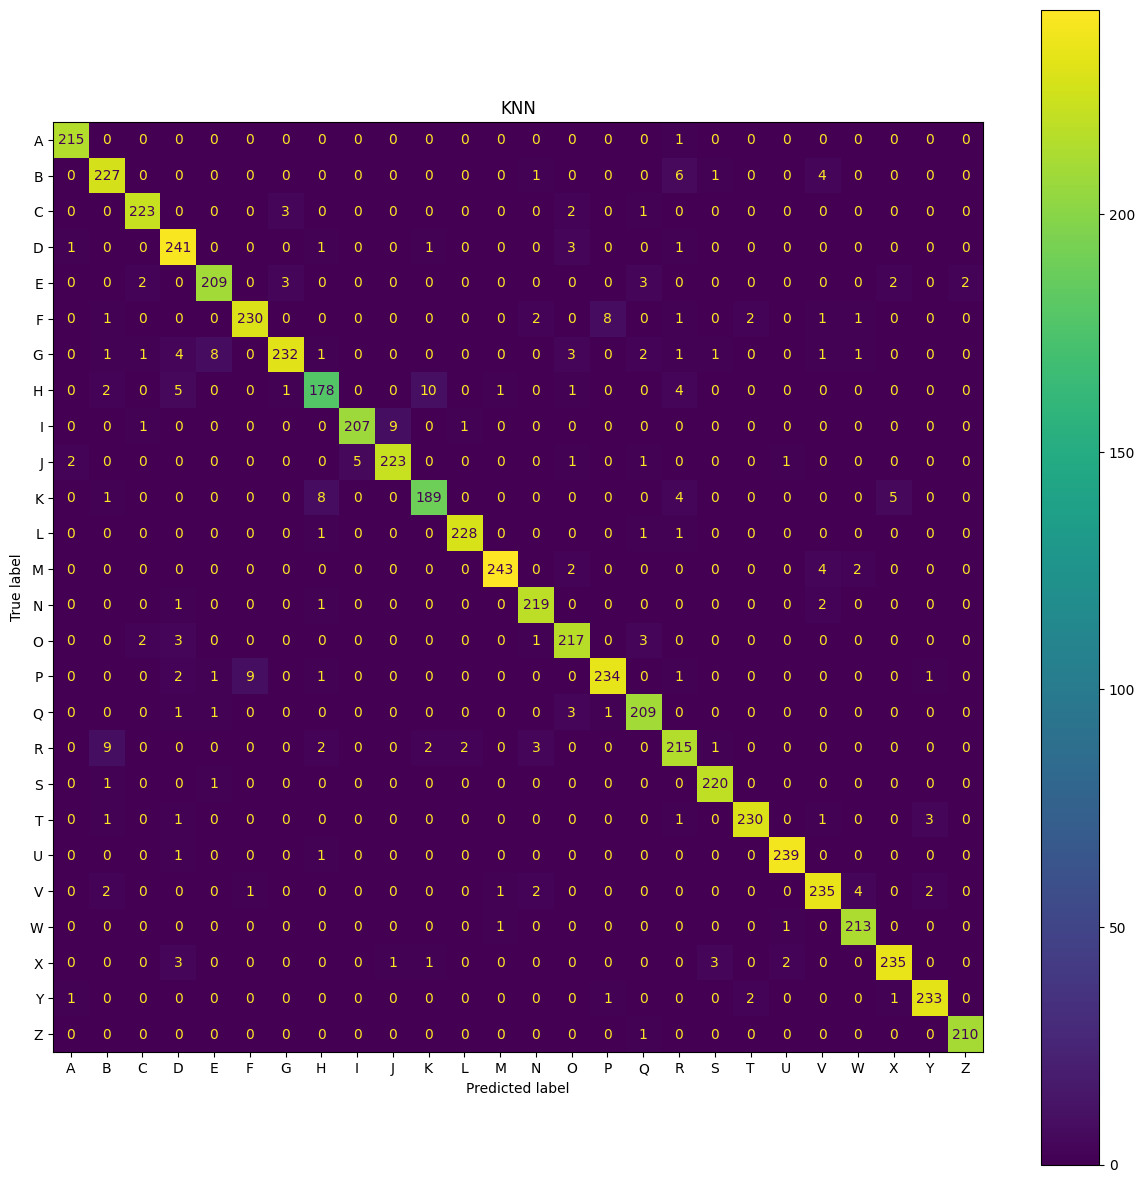

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       216
           B       0.93      0.95      0.94       239
           C       0.97      0.97      0.97       229
           D       0.92      0.97      0.95       248
           E       0.95      0.95      0.95       221
           F       0.96      0.93      0.95       246
           G       0.97      0.91      0.94       256
           H       0.92      0.88      0.90       202
           I       0.98      0.95      0.96       218
           J       0.96      0.96      0.96       233
           K       0.93      0.91      0.92       207
           L       0.99      0.99      0.99       231
           M       0.99      0.97      0.98       251
           N       0.96      0.98      0.97       223
           O       0.94      0.96      0.95       226
           P       0.96      0.94      0.95       249
           Q       0.95      0.97      0.96       215
           R       0.91    

In [7]:
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=26, n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred.ravel()))

cm=confusion_matrix(y_test, y_pred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("KNN")
plt.show()
decisionReport=classification_report(y_test, y_pred.ravel())
print(decisionReport)

https://anakin297.medium.com/feature-selection-methods-a1931a1243fd


https://www.blog.trainindata.com/feature-selection-with-filter-methods/


https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py


https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
One-vs-Rest multiclass ROC
The One-vs-the-Rest (OvR) multiclass strategy, also known as one-vs-all, consists in computing a ROC curve per each of the n_classes. In each step, a given class is regarded as the positive class and the remaining classes are regarded as the negative class as a bulk.


https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-feature-selection#2.4

In [106]:
data=pd.read_csv('./satellite/sat.trn', header=None, delimiter=" ")

data.head

<bound method NDFrame.head of       0    1    2   3   4    5    6   7   8    9   ...   27  28   29   30  \
0     92  115  120  94  84  102  106  79  84  102  ...  104  88  121  128   
1     84  102  106  79  84  102  102  83  80  102  ...  100  84  107  113   
2     84  102  102  83  80  102  102  79  84   94  ...   87  84   99  104   
3     80  102  102  79  84   94  102  79  80   94  ...   79  84   99  104   
4     84   94  102  79  80   94   98  76  80  102  ...   79  84  103  104   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ..  ...  ...   
4430  56   64  108  96  64   71  108  96  68   75  ...   92  66   83  108   
4431  64   71  108  96  68   75  108  96  71   87  ...   96  66   87  104   
4432  68   75  108  96  71   87  108  88  71   91  ...   89  63   87  104   
4433  71   87  108  88  71   91  100  81  76   95  ...   89  70  100  104   
4434  71   91  100  81  76   95  108  88  80   95  ...   85  70   91  104   

       31  32   33   34  35  36  
0     100  

In [107]:
x = data.iloc[:,:-1]

x.head

<bound method NDFrame.head of       0    1    2   3   4    5    6   7   8    9   ...   26   27  28   29  \
0     92  115  120  94  84  102  106  79  84  102  ...  134  104  88  121   
1     84  102  106  79  84  102  102  83  80  102  ...  128  100  84  107   
2     84  102  102  83  80  102  102  79  84   94  ...  113   87  84   99   
3     80  102  102  79  84   94  102  79  80   94  ...  104   79  84   99   
4     84   94  102  79  80   94   98  76  80  102  ...  104   79  84  103   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ...  ..  ...   
4430  56   64  108  96  64   71  108  96  68   75  ...  108   92  66   83   
4431  64   71  108  96  68   75  108  96  71   87  ...  108   96  66   87   
4432  68   75  108  96  71   87  108  88  71   91  ...  104   89  63   87   
4433  71   87  108  88  71   91  100  81  76   95  ...  104   89  70  100   
4434  71   91  100  81  76   95  108  88  80   95  ...  104   85  70   91   

       30   31  32   33   34  35  
0     128 

In [108]:
y = data.iloc[:,-1:]

y.head

<bound method NDFrame.head of       36
0      3
1      3
2      3
3      3
4      3
...   ..
4430   5
4431   5
4432   4
4433   4
4434   4

[4435 rows x 1 columns]>

In [109]:
ttest_p = []

for column in x.columns:
    sample_scores = x
    t_stat, p_value = ttest_1samp(sample_scores, x[column].mean())
    ttest_p.append(p_value)

    print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: [  0.          42.14432648 119.22944833  46.59856347  -1.30299744
  40.94537012 118.95490963  46.28450523  -2.51863223  39.86715577
 117.80486566  45.73337876  -0.48377135  41.66991959 119.47131377
  46.68229109  -1.70520084  40.74330797 118.52007568  46.45061766
  -2.73988837  39.88615042 117.61874565  45.76891354  -1.07164051
  41.52295358 119.02703717  46.54996327  -2.16908161  40.75463273
 118.18409816  46.28750317  -3.35456491  40.0211351  118.26666802
  46.20690539], P-value: [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.92643297e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.18160721e-002 2.54750029e-297 0.00000000e+000 0.00000000e+000
 6.28572041e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 8.82270179e-002 1.49711118e-308 0.00000000e+000 0.00000000e+000
 6.17060194e-003 1.45827723e-297 0.00000000e+000 0.00000000e+000
 2.83939857e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 3.01294603e-002 1.06993090e-308 0.00000000e+

In [110]:
ttest_p = []

print(x.shape)
print(x[0].shape)

for column in x.columns:
    sample_scores = x
    t_stat, p_value = ttest_1samp(sample_scores, x[column].mean())
    ttest_p.append(np.mean(p_value)-(1/36))

    print(f"P-value: {p_value}")

(4435, 36)
(4435,)
P-value: [1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.92643297e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.18160721e-002 2.54750029e-297 0.00000000e+000 0.00000000e+000
 6.28572041e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 8.82270179e-002 1.49711118e-308 0.00000000e+000 0.00000000e+000
 6.17060194e-003 1.45827723e-297 0.00000000e+000 0.00000000e+000
 2.83939857e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 3.01294603e-002 1.06993090e-308 0.00000000e+000 0.00000000e+000
 8.01574666e-004 2.75783676e-299 0.00000000e+000 0.00000000e+000]
P-value: [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.76890272e-06
 0.00000000e+00 2.98989418e-01 0.00000000e+00 1.03294959e-06
 0.00000000e+00 3.45562279e-02 0.00000000e+00 3.67243779e-07
 0.00000000e+00 7.18022042e-01 0.00000000e+00 2.13270762e-05
 0.00000000e+00 2.18777585e-01 0.00000000e+00 1.24807470e-05
 0.00000000e+00 3.83016683e-02 0.00000000e+00 1.33497768e-06
 0.00000000

In [111]:
for column in x.columns:
    sample_scores = x[column]
    stat, p_value = ks_1samp(sample_scores, scipy.stats.norm.cdf)

    print(f"T-statistic: {stat}, P-value: {p_value}")

T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statistic: 1.0, P-value: 0.0
T-statis

In [112]:
stat, p_value = ks_1samp(x, scipy.stats.norm.cdf)
print(f"T-statistic: {stat}, P-value: {p_value}")
ks_p = p_value

T-statistic: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], P-value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [128]:
print(ttest_p)

[0.0345083311401211, 0.05991994454848412, 0.11825233461205355, 0.1779077347296401, 0.08148839866459558, 0.11157200171313265, 0.13263016404548367, 0.1591998291422353, 0.07876249414085765, 0.10215717135109785, 0.08741898461653072, 0.12671479205442843, 0.055208462199934985, 0.08614577584472527, 0.08294873331304711, 0.17577987739439388, 0.08366354684971951, 0.11537225539808031, 0.13015667707877338, 0.1823089892512869, 0.07089826274107083, 0.10394338820147513, 0.09833139527147451, 0.1588657019125363, 0.0762356548140659, 0.0948981785100744, 0.11775773931366736, 0.16784542309216394, 0.08307392964392414, 0.11539261162832189, 0.13337132695418352, 0.17984742583332558, 0.038353576450860974, 0.1040448987921385, 0.11240650772709125, 0.18193131455669448]


In [113]:
data=pd.read_csv('./satellite/sat.trn', header=None, delimiter=" ")
X_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1:]

data=pd.read_csv('./satellite/sat.tst', header=None, delimiter=" ")
X_test = data.iloc[:,:-1]
y_test = data.iloc[:,-1:]


In [114]:
for column in x.columns:
    model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=26, n_neighbors=5, weights='distance')
    model.fit(X_train.filter([column], axis = 1), y_train.values.ravel())
    y_pred = model.predict_proba(X_test.filter([column], axis = 1))

    # Multiclass ROC UC needs class probabilities instead of classes, but must be enabled in SVC
    print(roc_auc_score(y_test, y_pred, multi_class="ovr"))

0.7535632273291685
0.7778476477036267
0.681599614498635
0.7373348616782294
0.753845263694726
0.7864408877480953
0.694702021737878
0.7447315295725024
0.749069064482483
0.7689794639829511
0.6794729042503561
0.7292818452243321
0.7686316116635613
0.7888350717666942
0.7066452410603811
0.7436773773148313
0.7785137943118764
0.7850637625332485
0.7105533946935821
0.7608740808168762
0.7659513043454641
0.7922554944918122
0.6988292091352738
0.7431025156441223
0.7331577678030219
0.7647705477714618
0.6667905992714624
0.7216815818605592
0.7543370894188364
0.774646732759393
0.7029975426822674
0.730336722906086
0.7519092298695732
0.7646287010830624
0.679018055351742
0.7245328972515783


In [116]:
select_fdr_classif = SelectFdr(score_func=f_classif)
select_fdr_classif.fit(X_train, y_train.values.ravel())

X_train_selected = select_fdr_classif.transform(X_train)
X_test_selected  = select_fdr_classif.transform(X_test)

print('Train/Test Sizes After Feature Selection: ', X_train_selected.shape, X_test_selected.shape)
feature_selection_mask_classif = select_fdr_classif.get_support()
print('Classification Mask : ', feature_selection_mask_classif)

Train/Test Sizes After Feature Selection:  (4435, 36) (2000, 36)
Classification Mask :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [117]:
print(fdrcorrection(ttest_p))

print(fdrcorrection(ks_p)) #P-value 0 for KS, conclude that the distributions are different

(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False]), array([0.17147742, 0.17147742, 0.17147742, 0.18230899, 0.17147742,
       0.17147742, 0.17147742, 0.18230899, 0.17147742, 0.17147742,
       0.17147742, 0.17147742, 0.17147742, 0.17147742, 0.17147742,
       0.18230899, 0.17147742, 0.17147742, 0.17147742, 0.18230899,
       0.17147742, 0.17147742, 0.17147742, 0.18230899, 0.17147742,
       0.17147742, 0.17147742, 0.18230899, 0.17147742, 0.17147742,
       0.17147742, 0.18230899, 0.17147742, 0.17147742, 0.17147742,
       0.18230899]))
(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  T

In [118]:
print(false_discovery_control(ttest_p))
print(false_discovery_control(ks_p)) #P-value 0 for KS, conclude that the distributions are different

[0.17147742 0.17147742 0.17147742 0.18230899 0.17147742 0.17147742
 0.17147742 0.18230899 0.17147742 0.17147742 0.17147742 0.17147742
 0.17147742 0.17147742 0.17147742 0.18230899 0.17147742 0.17147742
 0.17147742 0.18230899 0.17147742 0.17147742 0.17147742 0.18230899
 0.17147742 0.17147742 0.17147742 0.18230899 0.17147742 0.17147742
 0.17147742 0.18230899 0.17147742 0.17147742 0.17147742 0.18230899]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [119]:
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=26, n_neighbors=5, weights='distance')
sfs = SequentialFeatureSelector(model)
sfs.fit(x, y.values.ravel())
sfs.get_support()

array([ True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False])

C:\Users\fresq\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8285


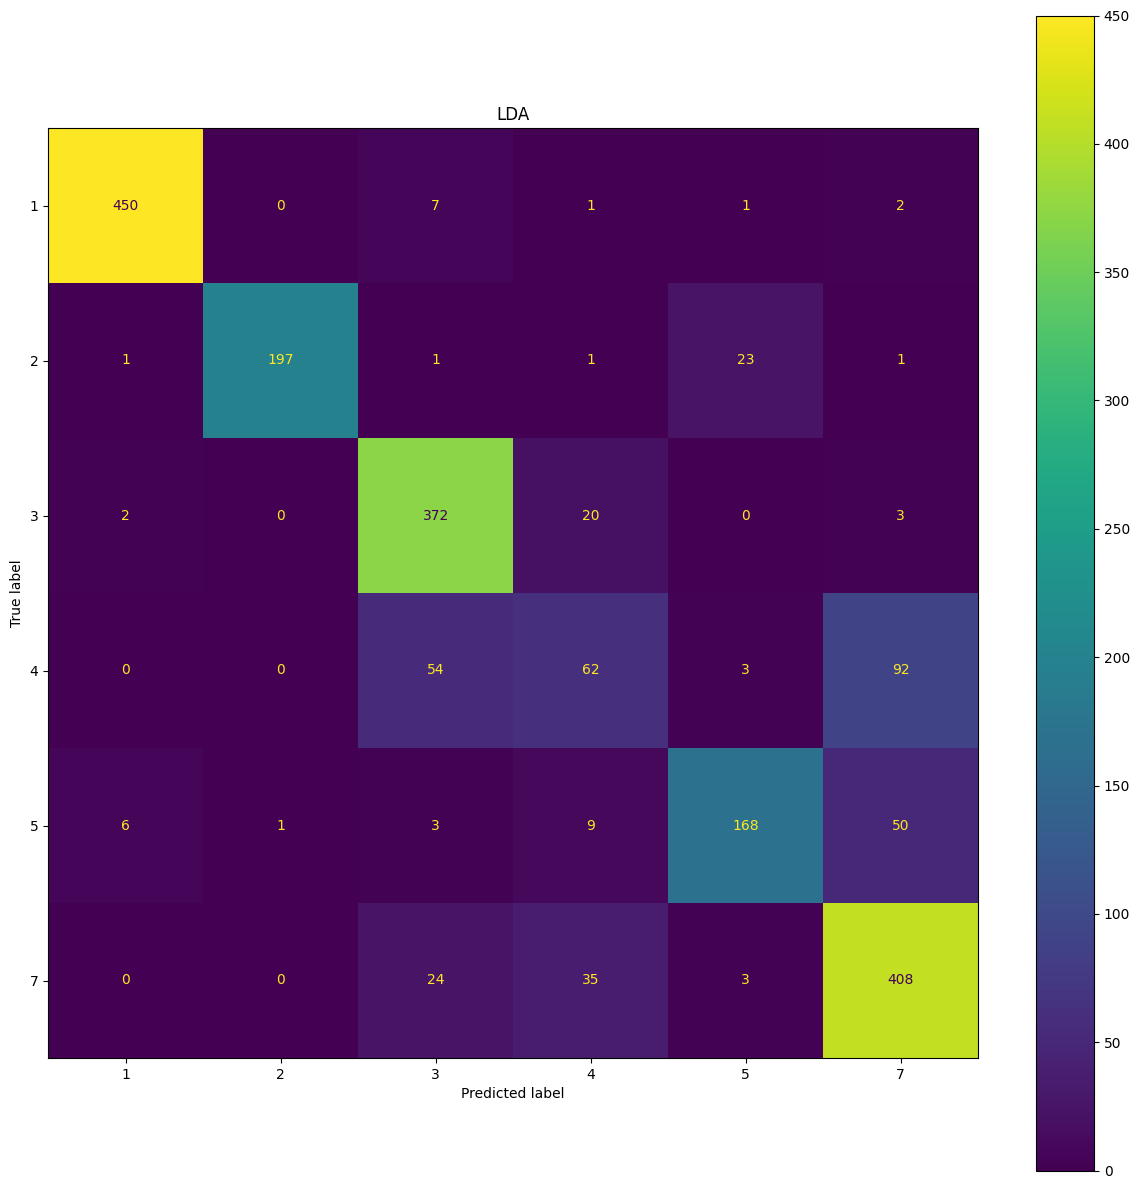

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       461
           2       0.99      0.88      0.93       224
           3       0.81      0.94      0.87       397
           4       0.48      0.29      0.37       211
           5       0.85      0.71      0.77       237
           7       0.73      0.87      0.80       470

    accuracy                           0.83      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.82      0.83      0.82      2000



In [120]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred.ravel()))

cm=confusion_matrix(y_test, y_pred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("LDA")
plt.show()
decisionReport=classification_report(y_test, y_pred.ravel())
print(decisionReport)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

print(scaled_data)

[[ 1.6504898   1.37065618  1.24035744 ...  1.04773951  0.83669871
   0.23370924]
 [ 1.06432744  0.79853645  0.40053984 ...  0.69624747  0.29644556
  -0.18971944]
 [ 1.06432744  0.79853645  0.16059195 ...  0.69624747  0.29644556
  -0.18971944]
 ...
 [-0.10799728 -0.38971222  0.52051378 ...  0.74018398  0.29644556
   0.12785207]
 [ 0.11181361  0.1383983   0.52051378 ...  0.34475544  0.29644556
   0.12785207]
 [ 0.11181361  0.31443514  0.04061801 ...  0.34475544  0.05633305
  -0.08386227]]


In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(scaled_data)

PCA(n_components=0.95, svd_solver='full')

In [123]:
print(pca.explained_variance_ratio_)

[0.45789971 0.39112147 0.04466764 0.02526733 0.01884536 0.01725771]


In [124]:
print(pca.components_)

[[ 1.69774105e-01  1.91011387e-01  1.80952709e-01  1.01766744e-01
   1.74188546e-01  1.93770250e-01  1.85224076e-01  1.04071975e-01
   1.70154350e-01  1.88054890e-01  1.79232738e-01  9.99806956e-02
   1.73566621e-01  1.95610257e-01  1.87284812e-01  1.05266446e-01
   1.78781459e-01  1.99868633e-01  1.91008978e-01  1.07432152e-01
   1.75016111e-01  1.94763930e-01  1.85254925e-01  1.03633486e-01
   1.66271031e-01  1.89543897e-01  1.80427833e-01  1.00622913e-01
   1.72099751e-01  1.94015180e-01  1.83565173e-01  1.02233301e-01
   1.68866861e-01  1.90313673e-01  1.78468096e-01  9.88681472e-02]
 [-1.51039508e-01 -1.24128869e-01  1.44497096e-01  2.17130245e-01
  -1.52537436e-01 -1.24535840e-01  1.48885808e-01  2.22006678e-01
  -1.49435785e-01 -1.21216547e-01  1.48449703e-01  2.17045743e-01
  -1.52966649e-01 -1.27937394e-01  1.49985274e-01  2.26279174e-01
  -1.56508046e-01 -1.29629693e-01  1.56585703e-01  2.32391239e-01
  -1.53862514e-01 -1.25997565e-01  1.54509590e-01  2.26203498e-01
  -1.4884

In [125]:
print(pca.n_components_)

6


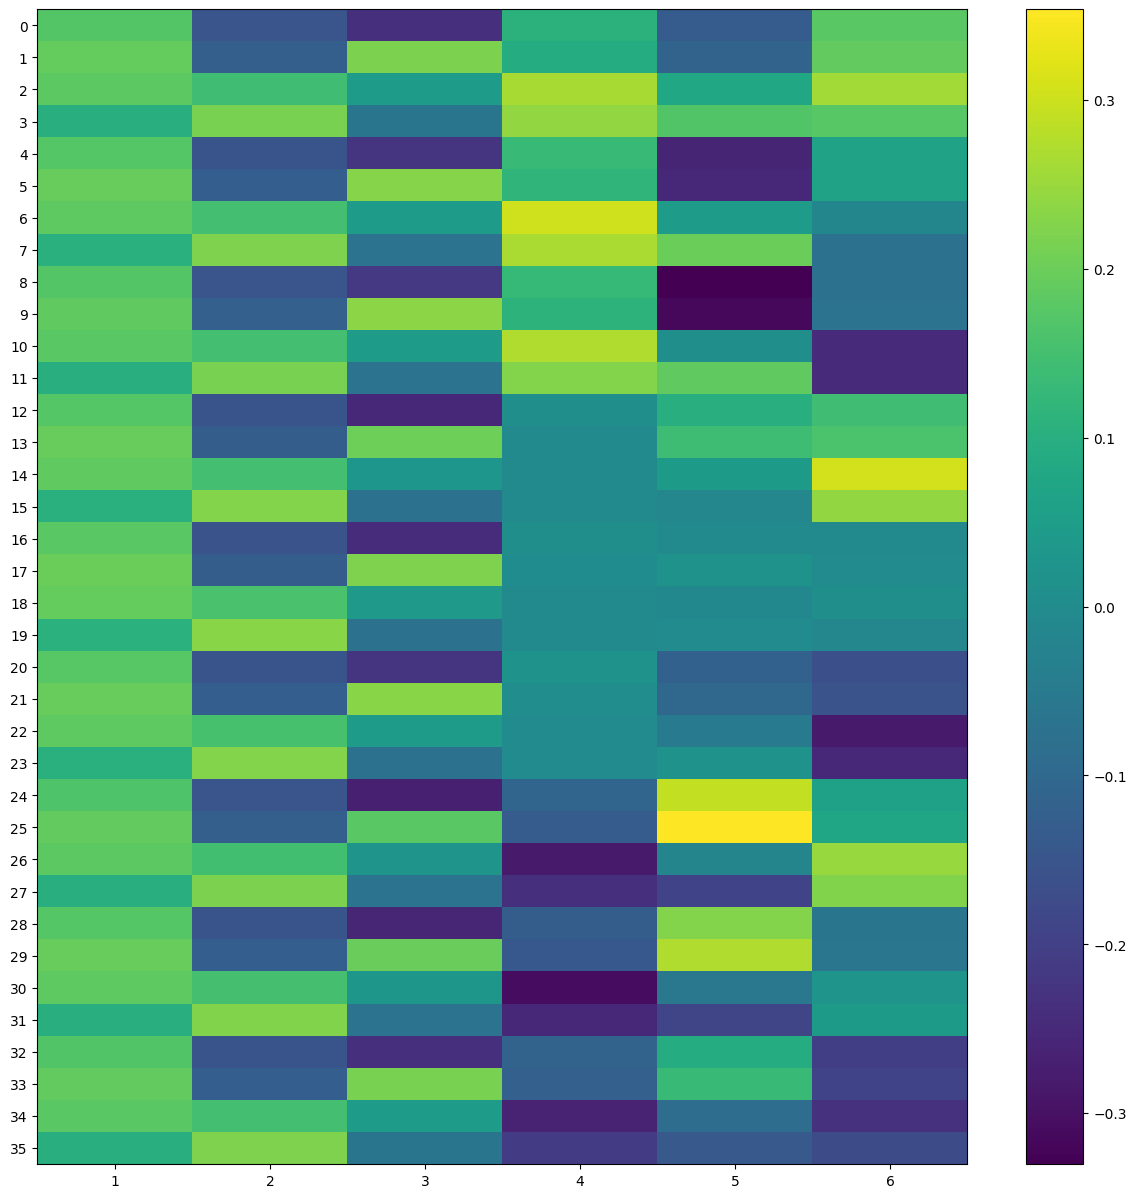

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(x.columns)), x.columns)
plt.xticks(range(6), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

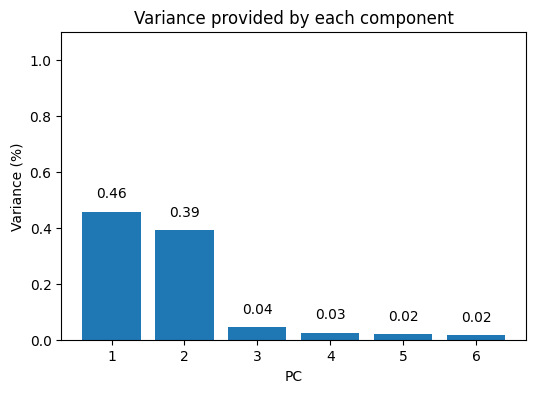

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Variance provided by each component')
ax.set_xlabel('PC')
ax.set_ylabel('Variance (%)');